In [1]:
# run class inside module
# Modify the ini file with params
# read spectra from output
# compare to other calculations
import os
import subprocess
#from classy import CLASS
import numpy as np
run_class=True
if run_class:
    os.chdir('/home/renee/class_delens/')



In [2]:
common_settings = {# LambdaCDM parameters
    'H0':67.5,
    'omega_b':0.0224,
    'omega_cdm':0.120,
    'N_ur':3.046,
    'A_s':1e-10 * np.exp(3.045),
    'n_s':0.9655,
    'tau_reio':0.054,
    'm_ncdm':0.06,
    'delensing':'yes',
    'output':'tCl,pCl,lCl,dlCl',
    'lensing':'yes',
    'accurate_lensing':1,
    'modes':'s',
    'l_max_scalars':3000,
    'delta_l_max': 1500,
    'temperature noise spectra type':'idealized',
    'polarization noise spectra type':'idealized',
    'lensing reconstruction noise spectra type':'internal',
    'delta_noise':0.000290888209,
    'sigma_beam':0.000290888209,
    'output_spectra_noise':'yes'}

common_settings['sigma_beam']

0.000290888209

In [3]:
# Code to generate a new class_delens ini file based on a dictionary entry

def change_input(fnamein, fnameout,dict):

    key_inds = []
    with open(fnamein, 'r') as f: lines = f.readlines()
    g=open(fnameout, 'w')
    for line in lines:
        if (len(line.split())>0): 
            if '##' not in line.split('=')[0]:
                for i,key in enumerate(dict.keys()):
                    if line.split('=')[0].strip()==key:
                        tmpl = line
                        lst = tmpl.split('=')
                        lst[-1]=str(dict[key])
                        line = '= '.join(lst)+'\n'
                        #print(line, 'line2')
        g.write(line)
    g.close()
        

In [4]:
if run_class:
    fnameout = 'test_out.ini'
    change_input('test.ini', fnameout,common_settings)
    cmd = "./class %s"%fnameout
    print(cmd)
    returned_value = subprocess.call(cmd, shell=True) 


./class test_out.ini


KeyboardInterrupt: 

Calculating idealized cmb temperature noise spectra in the form: 
 (N_l= square of the instrumental noise in mu K-radians ) * exp[ l * (l+1) * ( square of the beamsize in radians / (8 log 2))^2 ].
Calculating idealized cmb polarization noise spectra in the form: 
 (N_l= square of the instrumental noise in mu K-radians ) * exp[ l * (l+1) * ( square of the beamsize in radians / (8 log 2))^2 ].
Will calculate lensing reconstruction noise spectra estimate from lensed CMB spectra a la astro-ph/0301031.
Using CMB spectra calculated by CLASS.
Using *lensed* CMB spectra calculated by CLASS.
Done calculating lensing.
Calculating the delensed spectra.
[DEBUG] (Total) convergence ratio: multipole(l)-sum of (N_l[i+1]-N_l[i])/N_l[i]=0.000000e+00 for iteration i=0
[DEBUG] N_l is minimum-variance lensing noise reconstruction spectrum
Calculating the 2nd-derivatives of the lensed spectra for sampling.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class_output='/home/renee/class_delens/output/'
dClTTdCLTT_unlensed = np.loadtxt(class_output+'test_out05_dClTTdClTT_lensed.dat', unpack=True)
# DLM: Derivative of the Cl spectrum with respect to unlensed Cl. 
# Rows are L multipoles at the corresponding Cl, unlensed spectrum; 
# and columns are the l multipoles for the corresponding lensed Cl spectrum.
# for l=2 to 3000, printing if Mod[l,derv_binedges]==0. 
# We want dCl1/dCl_unlensed --> so the reverse of this arrangement??

dClTTdCLdd = np.loadtxt(class_output+'test_out05_dClTTdCldd_lensed.dat', unpack=True)





In [ ]:
hiddata = np.load("/home/renee/SOCov/matrices.npz")
# for key in hiddata.keys():
#     print(key)
dClttdClttu_hj = hiddata["dClttdClttu"]
dClttdClpp_hj = hiddata["dClttdClpp"]


In [ ]:
os.chdir('/home/renee/SOCov')

(2999,)


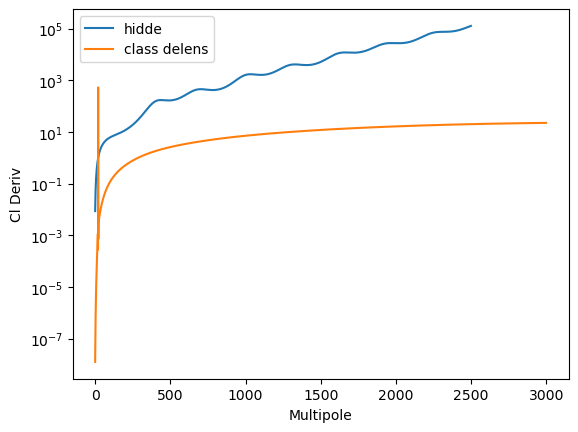

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import SOgen_cov_modules as gcm

labelXY='TT'
labelWZ='TT'
labelList = ['TT','EE','BB','TE']

ell_u,ell_l,specXY_u,specWZ_u,specXY_l,specWZ_l= gcm.get_CMB(labelXY,labelWZ,labelList)

# Default CAMB return is Dl not Cl
specXY_u = gcm.DltoCl(ell_u,specXY_u)
specXY_l = gcm.DltoCl(ell_l,specXY_l)
specWZ_u = gcm.DltoCl(ell_u,specWZ_u)
specWZ_l = gcm.DltoCl(ell_l,specWZ_l)

ell = np.arange(2,np.shape(dClTTdCLTT_unlensed)[1]+2)
print(np.shape(ell))

dspecXY_u_dspecXY_l = gcm.get_deriv(specXY_u, specXY_l, numflag=True)

#plt.plot(dspecXY_u_dspecXY_l[20,2:2500], label='numerical')

l1 = 20
convert_factor = (ell*(ell+1))/l1*(l1+1)

plt.plot(dClttdClttu_hj[l1,:], label='hidde')
plt.plot(convert_factor*dClTTdCLTT_unlensed[:,l1], label='class delens')
# Rows are L multipoles at the corresponding Cl, unlensed spectrum; 
# and columns are the l multipoles for the corresponding lensed Cl spectrum.


plt.legend(loc='best')
plt.xlabel('Multipole')
plt.ylabel('Cl Deriv')
plt.yscale('log')

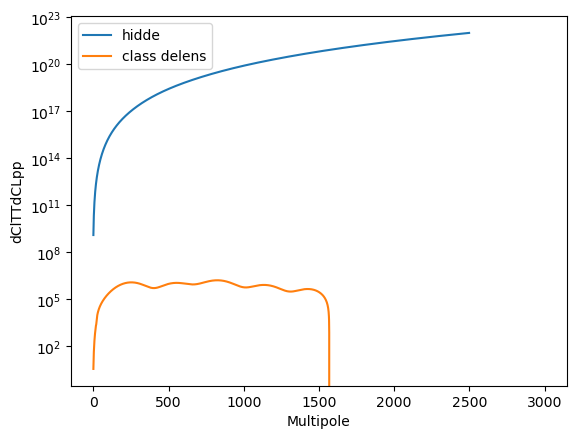

In [ ]:
plt.plot(dClttdClpp_hj[l1,:], label='hidde')
plt.plot(dClTTdCLdd[:,l1], label='class delens')
# Rows are L multipoles at the corresponding Cl, unlensed spectrum; 
# and columns are the l multipoles for the corresponding lensed Cl spectrum.


plt.legend(loc='best')
plt.xlabel('Multipole')
plt.ylabel('dClTTdCLpp')
plt.yscale('log')

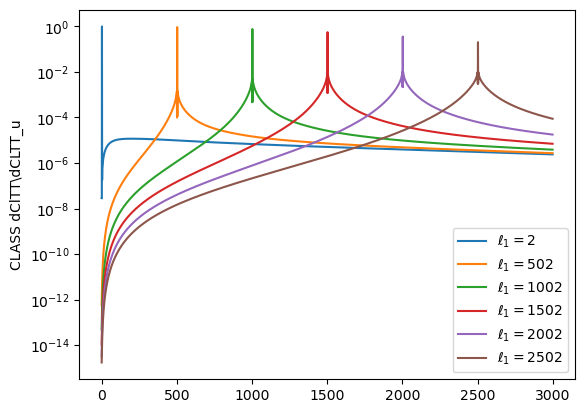

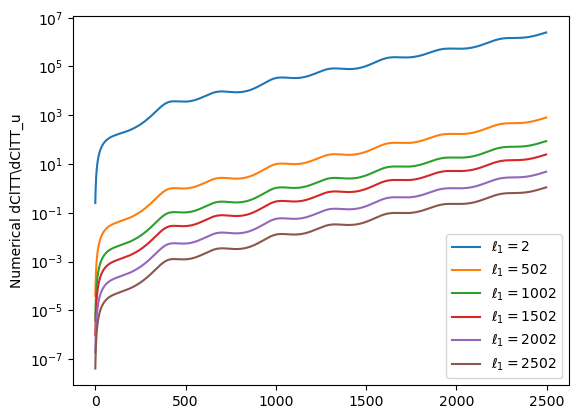

In [ ]:
l1vec = np.arange(2,3000,500)
#print(l1vec)
l2vec = ell



for l1 in l1vec:
    convert_factor = (ell*(ell+1))/l1*(l1+1)
    plt.figure(1)
    plt.plot(dClTTdCLTT_unlensed[:,l1], label='$\ell_1 = %i$'%l1)
    plt.figure(2)
    plt.plot(dClttdClttu_hj[l1,:], label='$\ell_1 = %i$'%l1)

plt.figure(1)    
plt.yscale('log')
plt.legend()
plt.ylabel('CLASS dClTT\dCLTT_u')
plt.savefig('class_delens_derivs.png')


plt.figure(2)    
plt.yscale('log')
plt.legend()
plt.ylabel('Numerical dClTT\dClTT_u')
plt.savefig('HJ_derivs.png')


Trying to do this with CAMB now as a comparison


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower, correlations
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))
# make sure the version and path is what you expect

Using CAMB 1.3.6 installed at /home/renee/cosmosis2p0/env/lib/python3.10/site-packages/camb


In [ ]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

clpp = results.get_lens_potential_cls()
print(np.shape(clpp))
cls = powers['unlensed_scalar']

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
(2651, 3)


In [ ]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
dcl = correlations.lensed_cl_derivatives(cls, clpp[:,0], lmax=None, theta_max=np.pi / 32, 
                                   apodize_point_width=10, sampling_factor=1.4)

print(np.shape(dcl))

(4, 2551, 2551)


Text(0, 0.5, '$dD_\\ell/d\\log(C^{\\phi}_L)$')

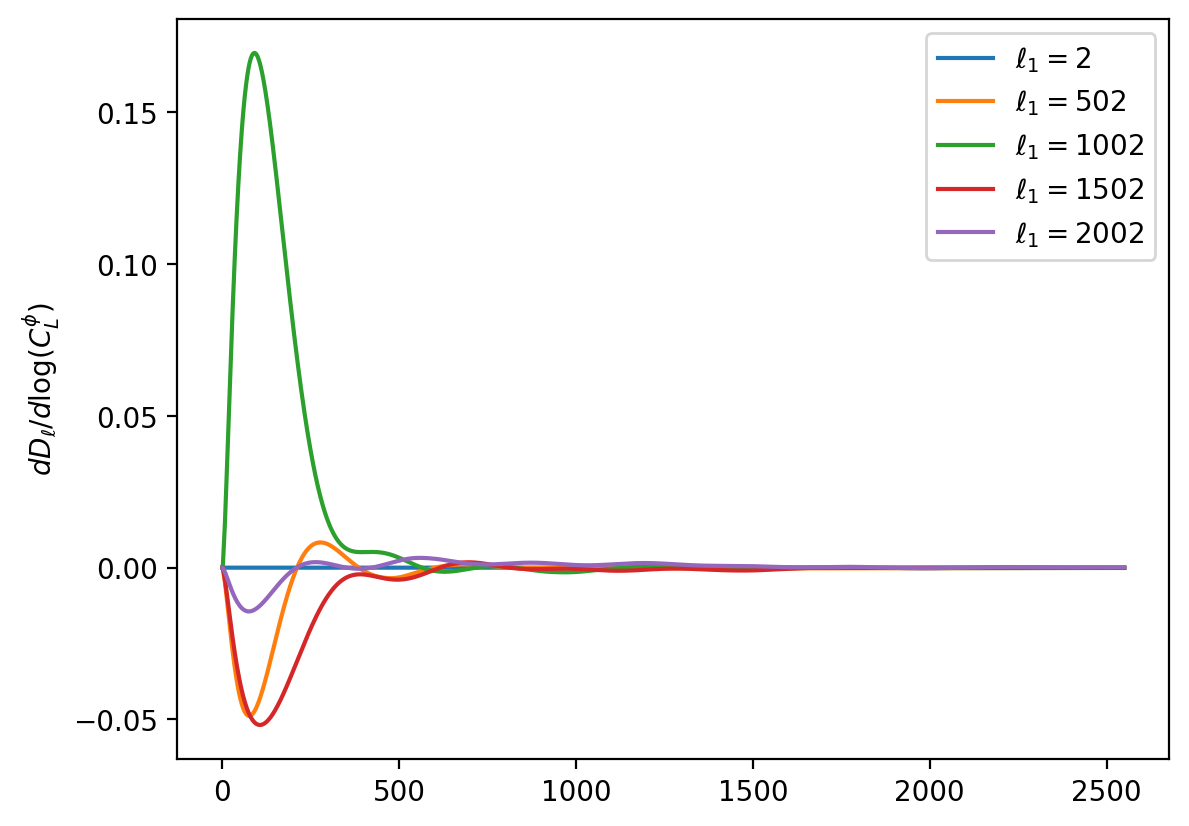

In [ ]:
ls = np.arange(cls.shape[0])
l1vec = np.arange(2,2500,500)
for l1 in l1vec:
    plt.plot(ls, dcl[0,l1,:], label='$\ell_1=%i$'%l1)

plt.legend()
plt.ylabel('$dD_\ell/d\log(C^{\phi}_L)$')